<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/tsk1/Torch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import os
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn.functional as F

In [182]:
# read dataset
DRIVE = '/content/drive/My Drive'
titanic_path = os.path.join(DRIVE, 'titanic_precessed.csv')

In [183]:
df = pd.read_csv(titanic_path, index_col=0)
df.columns

Index(['survived', 'sex', 'Family', 'Is_Alone', 'Cabin_A10', 'Cabin_A11',
       'Cabin_A14', 'Cabin_A16', 'Cabin_A18', 'Cabin_A19',
       ...
       'Title_Rev', 'Title_Sir', 'Title_the Countess', 'Fare_Low', 'Fare_Mid',
       'Fare_High_Mid', 'Fare_High', 'Class_1', 'Class_2', 'Class_3'],
      dtype='object', length=256)

In [184]:
Y = df[['survived']].astype(np.float32)
X = df.drop(['survived'], axis=1).astype(np.float32)

In [185]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest, =  train_test_split(X, Y)
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((981, 255), (981, 1), (328, 255), (328, 1))

In [186]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(255, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a = self.fc(input_)
        y = self.out_act(a)
        return y
    
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [187]:

def train_epoch(model, opt, criterion, num_steps=50):
    model.train()
    for _ in range(num_steps):
        xbatch = Xtrain.sample(200)
        ybatch = Ytrain.loc[xbatch.index]
        x_batch = Variable(torch.tensor(xbatch.values))
        y_batch = Variable(torch.tensor(ybatch.values))

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        y_hat_valid = net(Variable(torch.tensor(Xtest.values)))
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        loss_2 = criterion(y_hat_valid, Variable(torch.tensor(Ytest.values)))
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()
    return float(loss.data.numpy()), float(loss_2.data.numpy())

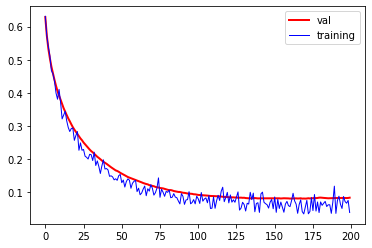

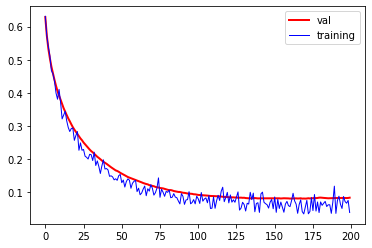

In [188]:
num_epochs = 200
losses_train = []
losses_test = []
for i in range(num_epochs):
  loss_train, loss_test = train_epoch(net, opt, criterion)
  losses_train.append(loss_train)
  losses_test.append(loss_test)
  plt.clf()
  plt.plot(losses_test, 'r-', lw=2, label='val')
  plt.plot(losses_train, 'b-', lw=1, label='training')
  plt.legend()
  display.clear_output(wait=True)
  display.display(plt.gcf())